# Linear Regression

## Module Import

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

## Simple Linear Regression : statsmodels

In [3]:
score_data=pd.read_csv('test_score.csv')

In [4]:
score_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
# 상황 : 난 reading과 writing의 점수의 상관 관계에 대해서 Linear Regression으로 예측 모델을 만들고 싶다!
data=score_data[['reading score', 'writing score']]
data.columns=['reading_score','writing_score']
X=data['reading_score']
y=data['writing_score']

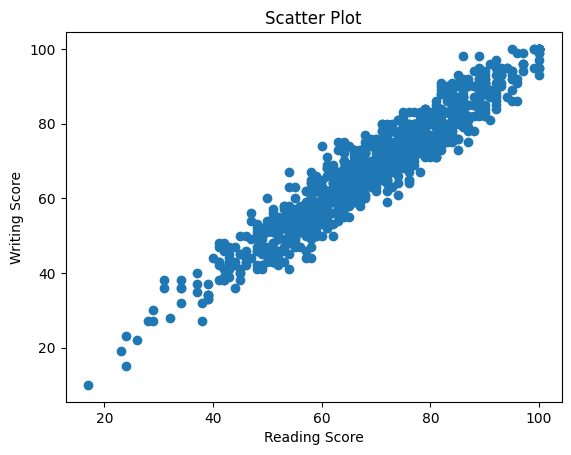

In [6]:
# 시각화
plt.scatter(x=X, y=y)
plt.title('Scatter Plot')
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.show()

In [7]:
# 방법1
import statsmodels.api as sm
X_con = sm.add_constant(X)
model = sm.OLS(y, X_con)
result1 = model.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:22:12   Log-Likelihood:                -2928.4
No. Observations:                1000   AIC:                             5861.
Df Residuals:                     998   BIC:                             5871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.6676      0.694     -0.962

In [8]:
# 방법2
import statsmodels.api as sm
reg = sm.OLS.from_formula("writing_score ~ reading_score", data)
result2=reg.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:22:12   Log-Likelihood:                -2928.4
No. Observations:                1000   AIC:                             5861.
Df Residuals:                     998   BIC:                             5871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.6676      0.694     -0.962

In [9]:
b0=result1.params[0]
b1=result1.params[1]

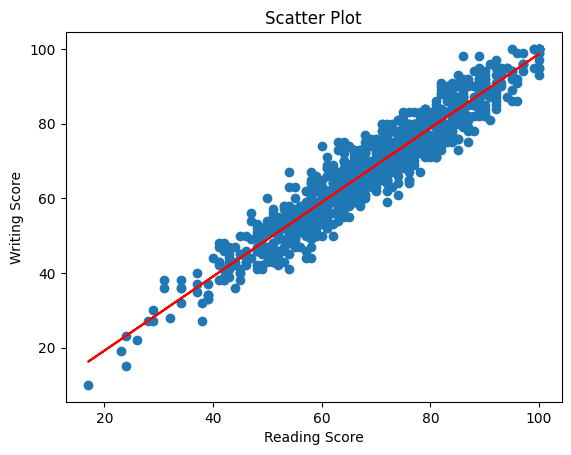

In [10]:
# matplotlib으로 시각화
plt.scatter(x=X, y=y)
plt.plot(X, b0+b1*X, color='red')
plt.title('Scatter Plot')
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.show()

In [11]:
# plotly는 trendline이라는 파라미터가 존재하여 간단하게 회귀선을 그을 수 있다.
fig = px.scatter(data, x="reading_score", y="writing_score", trendline='ols', trendline_color_override='red')
fig.show()

In [12]:
# train 데이터와 test 데이터를 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)       # random_state를 지정하면 랜덤으로 분리되는 걸 고정시킬 수 있다

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800,)
(200,)
(800,)
(200,)


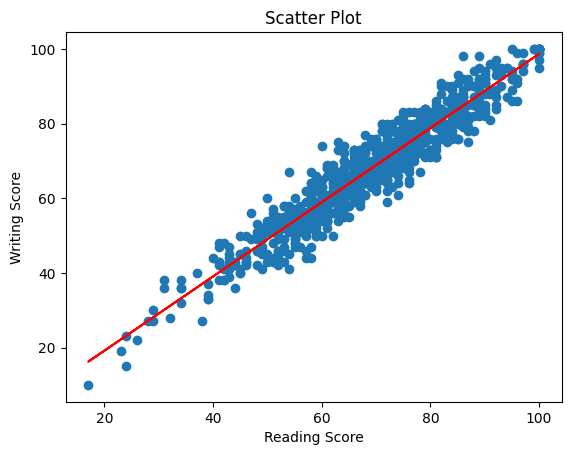

In [14]:
# 시각화
plt.scatter(x=X_train, y=y_train)
plt.plot(X_train,b0+b1*X_train, color='red')
plt.title('Scatter Plot')
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.show()

In [15]:
# 방법1을 통한 Linear Regression과 예측
import statsmodels.api as sm
X_train_con = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_con)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     8229.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:22:12   Log-Likelihood:                -2350.2
No. Observations:                 800   AIC:                             4704.
Df Residuals:                     798   BIC:                             4714.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7582      0.776     -0.977

In [16]:
from sklearn.metrics import mean_squared_error
b0=results.params[0]
b1=results.params[1]
r2=results.rsquared
# 예측값
y_pred=b0+b1*X_test

print("각 모델의 가중치(계수) : \n", b0)
print("절편 : ", b1)
print('R square : {:.3f}'.format(r2))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

각 모델의 가중치(계수) : 
 -0.7581626393448921
절편 :  0.9954185289015078
R square : 0.912
4.35164495356586


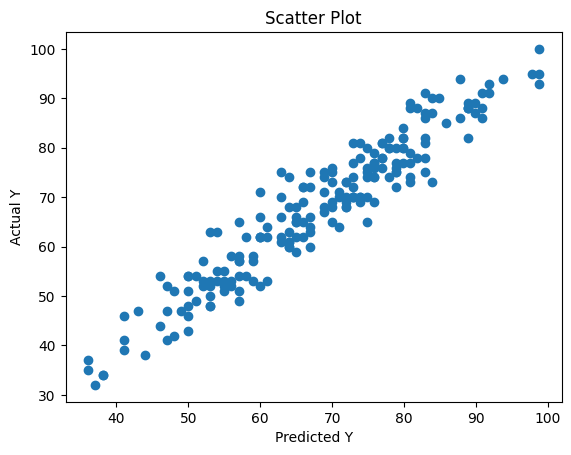

In [17]:
plt.scatter(x=y_pred, y=y_test)
plt.title('Scatter Plot')
plt.xlabel("Predicted Y")
plt.ylabel("Actual Y")
plt.show()

## Simple Linear Regression : Scikit-Learn

In [18]:
score_data=pd.read_csv('test_score.csv')

In [19]:
score_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [20]:
# 상황 : 난 reading과 writing의 점수의 상관 관계에 대해서 Linear Regression으로 예측 모델을 만들고 싶다!
data=score_data[['reading score', 'writing score']]
data.columns=['reading_score','writing_score']
X=data['reading_score']
y=data['writing_score']

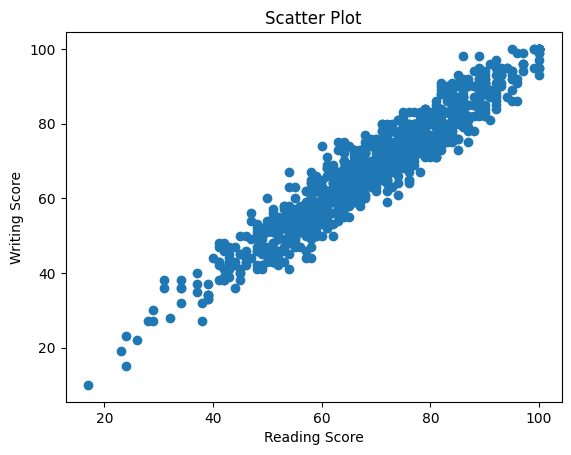

In [21]:
# 시각화
plt.scatter(x=X, y=y)
plt.title('Scatter Plot')
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.show()

In [22]:
# train 데이터와 test 데이터를 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)       # random_state를 지정하면 랜덤으로 분리되는 걸 고정시킬 수 있다

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800,)
(200,)
(800,)
(200,)


In [24]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

print("각 모델의 가중치(계수) : \n", model.coef_[0])
print("절편 : ", model.intercept_[0])
print('훈련 데이터의 점수 : {:.3f}'.format(model.score(X_train, y_train)))
print('테스트 데이터의 점수 : {:.3f}'. format(model.score(X_test, y_test)))

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

각 모델의 가중치(계수) : 
 [0.99541853]
절편 :  -0.7581626393448744
훈련 데이터의 점수 : 0.912
테스트 데이터의 점수 : 0.910
4.3516449535658595


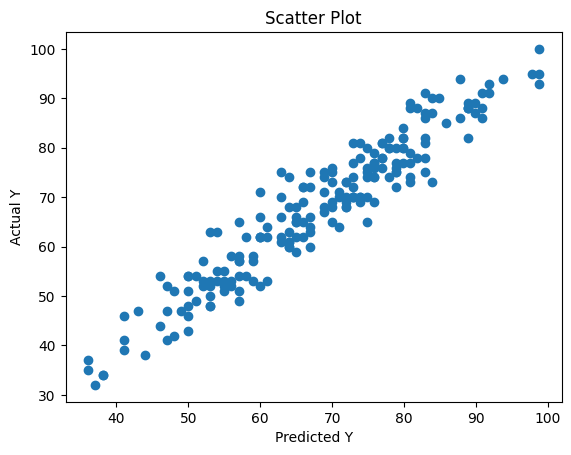

In [26]:
plt.scatter(x=y_pred, y=y_test)
plt.title('Scatter Plot')
plt.xlabel("Predicted Y")
plt.ylabel("Actual Y")
plt.show()

## Multiple Linear Regression : Scikit-Learn

In [27]:
# Scikit-Learn에 내장되어 있는 데이터셋 사용
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing(as_frame=True)
print(housing_data.DESCR)               # 사이킷런의 데이터셋은 DESCR을 통해서 데이터에 대한 정보를 간단하게 볼 수 있다.

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [28]:
df=housing_data.frame               # as_frame=True를 한다면 frame을 통해서 전체 데이터프레임을 볼 수 있다
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [29]:
X=pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)      # data는 독립변수의 데이터, feature_names는 독립변수의 변수이름
y=pd.DataFrame(data=housing_data.target, columns=housing_data.target_names)     # target은 종속변수의 데이터,

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [31]:
# train 데이터와 test 데이터를 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)       # random_state를 지정하면 랜덤으로 분리되는 걸 고정시킬 수 있다

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16512, 8)
(16512, 1)
(4128, 8)
(4128, 1)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

print("각 모델의 가중치(계수) : \n", model.coef_[0])
print("절편 : ", model.intercept_[0])
print('훈련 데이터의 점수 : {:.3f}'.format(model.score(X_train, y_train)))
print('테스트 데이터의 점수 : {:.3f}'. format(model.score(X_test, y_test)))

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

각 모델의 가중치(계수) : 
 [ 4.43946995e-01  9.73337913e-03 -1.20014445e-01  7.97856480e-01
  1.59098524e-07 -3.48723789e-03 -4.23012955e-01 -4.36538635e-01]
절편 :  -37.26341351302471
훈련 데이터의 점수 : 0.609
테스트 데이터의 점수 : 0.589
0.7364301356931373


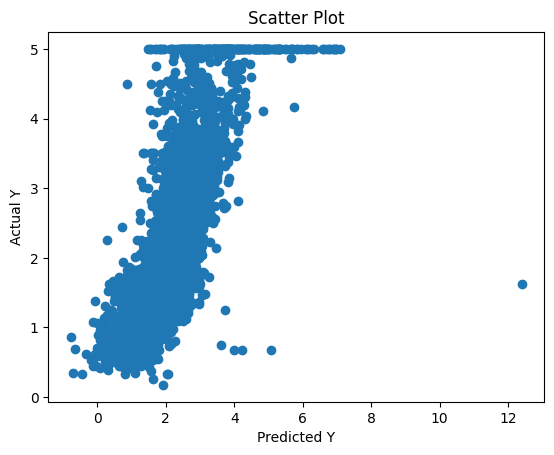

In [34]:
plt.scatter(x=y_pred, y=y_test)
plt.title('Scatter Plot')
plt.xlabel("Predicted Y")
plt.ylabel("Actual Y")
plt.show()